In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew #for some statistics

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
plt.style.use('seaborn')

from collections import Counter
import datetime
import wordcloud
import json

In [2]:
df = pd.read_csv('../input/startup-success-prediction/startup data.csv')

In [3]:
df.head(10)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,1/1/2002,2/15/2009,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,CA,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,c:22898,0,0,0,1,0,0,3.0000,1,closed
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,1/1/2005,NaN,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:16191,1,0,1,1,0,0,1.6667,1,acquired
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,1/1/2004,NaN,8/24/2005,10/4/2010,1.6466,6.7616,5.6055,7.3616,25,3,34100000,3,CA,1,0,0,0,0,finance,0,0,0,0,0,0,0,0,0,1,c:5192,0,0,1,1,0,1,3.5000,1,acquired
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,1/1/2002,NaN,8/2/2005,2/8/2013,3.5863,11.1123,8.0055,9.9945,13,3,9650000,4,MA,0,0,1,0,0,mobile,0,0,1,0,0,0,0,0,0,0,c:1043,1,0,1,0,0,1,4.0000,1,acquired
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,6/1/2005,NaN,2/1/2007,2/5/2010,1.6712,4.6849,2.9178,6.1151,14,3,5750000,4,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:498,1,1,1,0,0,0,1.0000,1,acquired


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [5]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [6]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
df_num.head(3)

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.00,1


In [7]:
df_cat=df.select_dtypes(include='object')
df_cat.head(3)

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired


In [ ]:
df['status'] = df.status.map({'acquired':1, 'closed':0})

In [9]:
#Tipe data status diganti dari object ke int
df['status'].astype(int)

0      1
1      1
2      1
3      1
4      0
5      0
6      1
7      1
8      1
9      1
10     1
11     0
12     0
13     1
14     1
15     0
16     0
17     1
18     1
19     0
20     1
21     0
22     0
23     0
24     0
25     1
26     1
27     1
28     1
29     1
30     0
31     1
32     0
33     1
34     0
35     0
36     0
37     0
38     1
39     1
40     1
41     1
42     0
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     0
56     1
57     1
58     1
59     1
60     0
61     0
62     1
63     0
64     1
65     1
66     0
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     0
75     0
76     0
77     1
78     1
79     0
80     1
81     0
82     0
83     1
84     1
85     0
86     1
87     0
88     0
89     1
90     1
91     0
92     1
93     1
94     1
95     0
96     1
97     0
98     1
99     0
100    0
101    1
102    1
103    1
104    1
105    0
106    1
107    0
108    1
109    0
110    1
1

In [10]:
#labels dan status
for index, row in df.iterrows():
    if row['labels']!=row['status']:
        print(index, row['labels'], row['status'])

In [11]:
df.drop(["labels"], axis=1, inplace=True)

In [12]:
describeNum = df.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,923.000000,572.297941,333.585431,1.000000,283.500000,577.000000,866.500000,1153.000000
latitude,923.000000,38.517442,3.741497,25.752358,37.388869,37.779281,40.730646,59.335232
longitude,923.000000,-103.539212,22.394167,-122.756956,-122.198732,-118.374037,-77.214731,18.057121
age_first_funding_year,923.000000,2.235630,2.510449,-9.046600,0.576700,1.446600,3.575350,21.895900
age_last_funding_year,923.000000,3.931456,2.967910,-9.046600,1.669850,3.528800,5.560250,21.895900
age_first_milestone_year,771.000000,3.055353,2.977057,-14.169900,1.000000,2.520500,4.686300,24.684900
age_last_milestone_year,771.000000,4.754423,3.212107,-7.005500,2.411000,4.476700,6.753400,24.684900
relationships,923.000000,7.710726,7.265776,0.000000,3.000000,5.000000,10.000000,63.000000
funding_rounds,923.000000,2.310943,1.390922,1.000000,1.000000,2.000000,3.000000,10.000000
funding_total_usd,923.000000,25419749.092091,189634364.488794,11000.000000,2725000.000000,10000000.000000,24725000.000000,5700000000.000000


In [13]:
describeNumCat = df.describe(include=["O"])
describeNumCat.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)


,count,unique,top,freq
state_code,923,35,CA,488
zip_code,923,382,94107,30
id,923,922,c:28482,2
city,923,221,San Francisco,128
Unnamed: 6,430,252,San Francisco CA 94105,12
name,923,922,Redwood Systems,2
founded_at,923,217,1/1/2003,55
closed_at,335,202,6/1/2013,25
first_funding_at,923,585,1/1/2008,18
last_funding_at,923,680,1/1/2008,11


In [14]:
cats = ['state_code','zip_code','id','city','Unnamed: 6','name','founded_at','closed_at','first_funding_at','last_funding_at','state_code.1','category_code','object_id','status'] 
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom state_code:
CA    488
NY    106
MA     83
TX     42
WA     42
CO     19
IL     18
PA     17
VA     13
GA     11
OR      7
NC      7
NJ      7
MD      7
FL      6
OH      6
MN      5
CT      4
DC      4
RI      3
TN      3
MI      3
UT      3
ME      2
AZ      2
MO      2
NV      2
NH      2
KY      2
IN      2
NM      1
ID      1
WV      1
WI      1
AR      1
Name: state_code, dtype: int64

Value count kolom zip_code:
94107             30
94105             23
95054             20
94103             19
94043             18
94041             16
94025             16
94110             15
10011             14
10003             13
94301             13
78701             12
98104             12
94104             11
1803              11
10013             11
94404             11
94306             11
94111             11
2451              10
10001             10
94085             10
10010             10
95134              9
94040              9
94403              9
94063         

In [15]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


In [16]:
# Checking Missing Values Column 
df[["Unnamed: 6", "closed_at", "age_first_milestone_year", "age_last_milestone_year", "state_code.1", "status"]].head(4)

,Unnamed: 6,closed_at,age_first_milestone_year,age_last_milestone_year,state_code.1,status
0,NaN,NaN,4.6685,6.7041,CA,1
1,NaN,NaN,7.0055,7.0055,CA,1
2,San Diego CA 92121,NaN,1.4575,2.2055,CA,1
3,Cupertino CA 95014,NaN,6.0027,6.0027,CA,1


In [17]:
df['Unnamed: 6'] = df.apply(lambda row: (row.city) + " " + (row.state_code) + " " +(row.zip_code)  , axis = 1)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


In [18]:
# Total Missing Values kolom "Unnamed: 6"
totalNull = df['Unnamed: 6'].isnull().sum()

print('Total Missing Values Kolom "Unnamed: 6": ', totalNull)

Total Missing Values Kolom "Unnamed: 6":  0


In [19]:
#diisi kosong
df['closed_at'] = df['closed_at'].fillna(value="31/12/2013")

In [21]:
totalNull = df['closed_at'].isnull().sum()

print('Total Missing Values Kolom "closed_at": ', totalNull)

Total Missing Values Kolom "closed_at":  0


In [22]:
df[['age_first_milestone_year','age_last_milestone_year','milestones']].head()

,age_first_milestone_year,age_last_milestone_year,milestones
0,4.6685,6.7041,3
1,7.0055,7.0055,1
2,1.4575,2.2055,2
3,6.0027,6.0027,1
4,0.0384,0.0384,1


In [23]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(value="0")
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(value="0")

In [24]:
for index, row in df.iterrows():
    if row['state_code']!=row['state_code.1']:
        print(index, row['state_code'], row['state_code.1'])

515 CA nan


In [25]:
df.drop(["state_code.1"], axis=1, inplace=True)

In [26]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values


In [28]:
df['age_first_milestone_year'] = df.age_first_milestone_year.astype(float)
df['age_last_milestone_year'] = df.age_last_milestone_year.astype(float)

(32.5, -0.5)

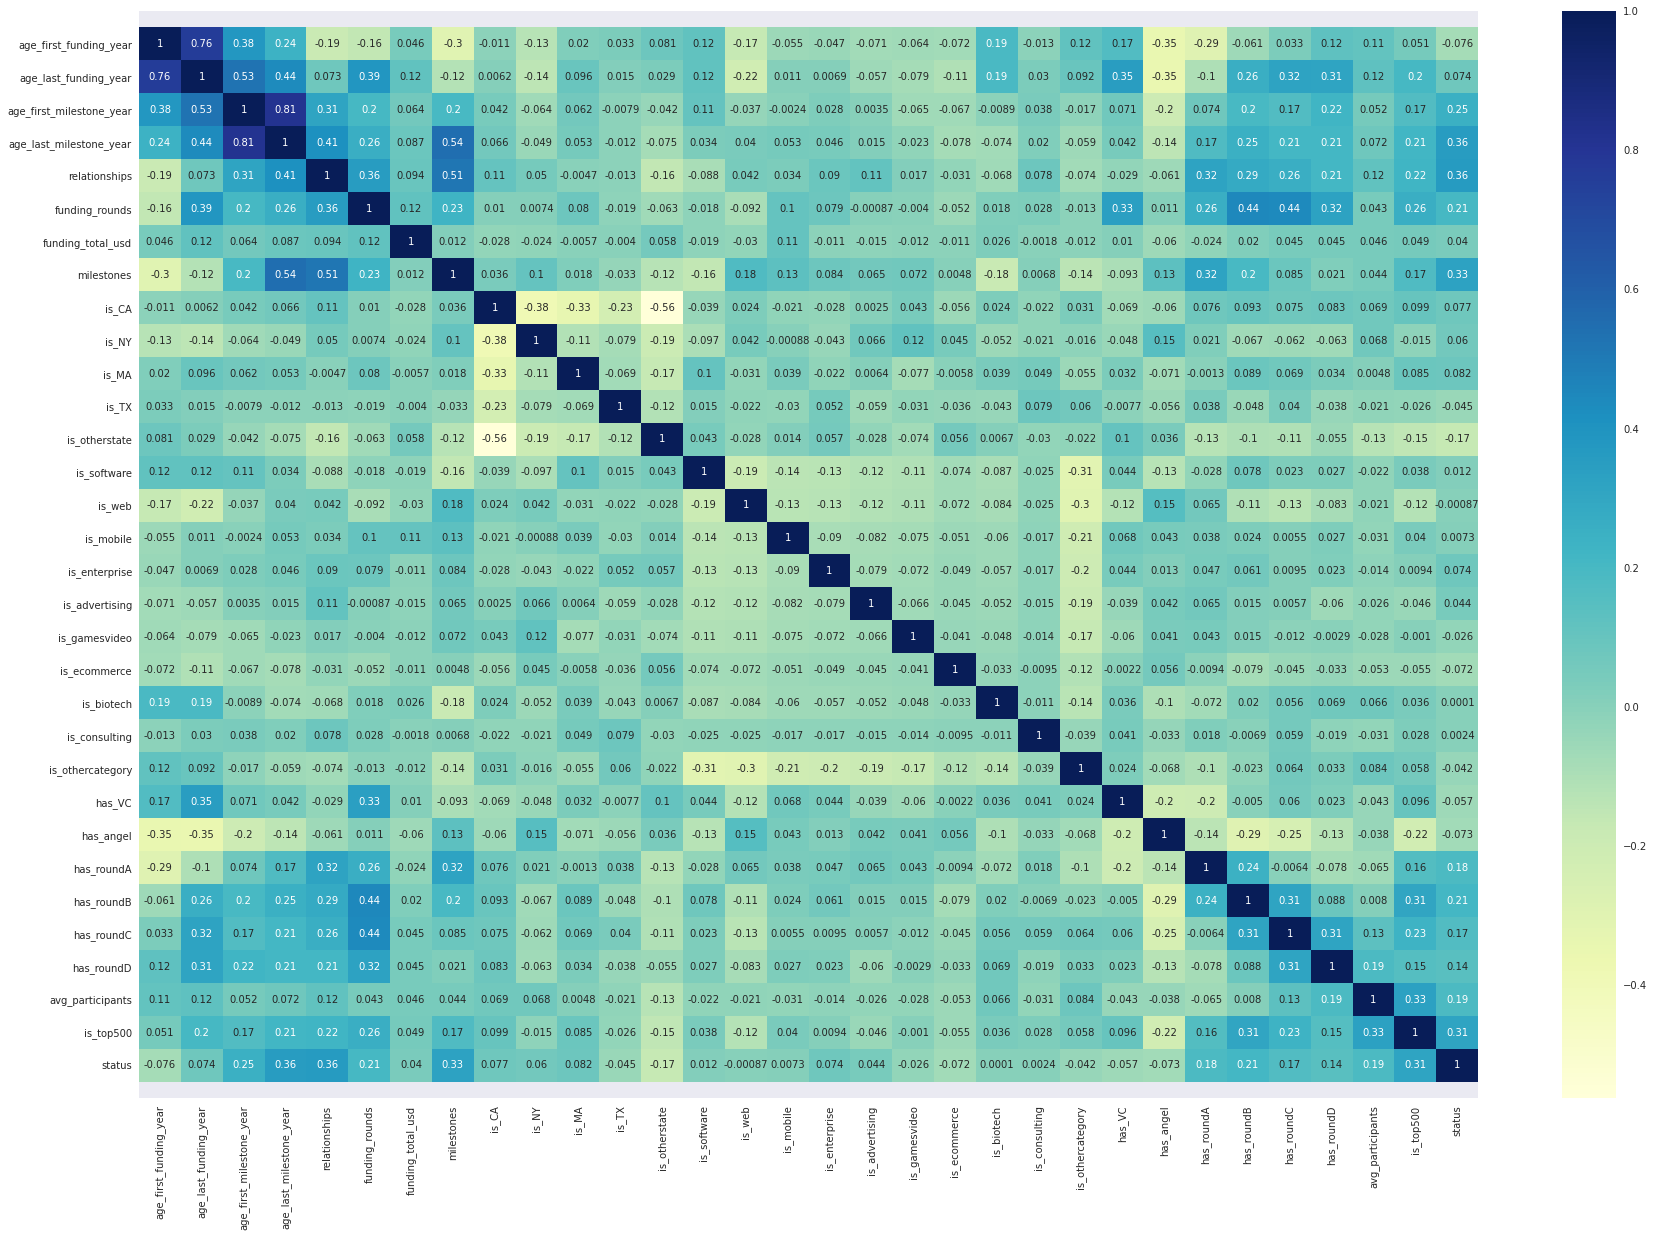

In [29]:
features = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_VC','has_angel','has_roundA','has_roundB','has_roundC','has_roundD','avg_participants','is_top500','status']

plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df[features].corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

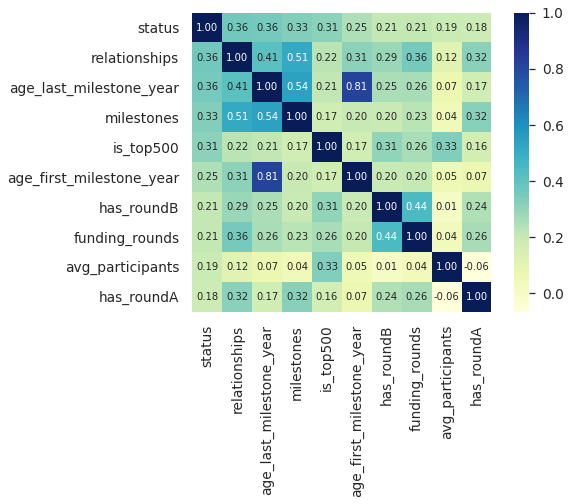

In [30]:
# 'SalePrice' correlation matrix (zoomed heatmap style)

#number of variables for heatmap
cols = df[features].corr().nlargest(10,'status')['status'].index
cm = np.corrcoef(df[cols].values.T) 
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap='YlGnBu', fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

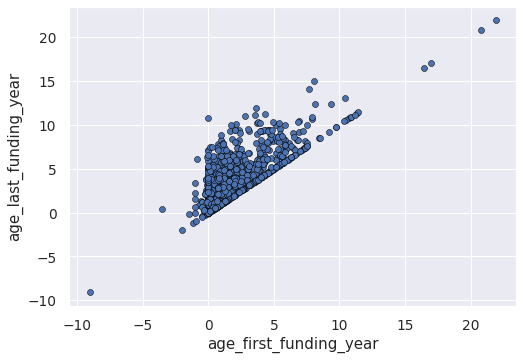

In [31]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['age_first_funding_year'], y=df['age_last_funding_year'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="age_first_funding_year", ylabel="age_last_funding_year")

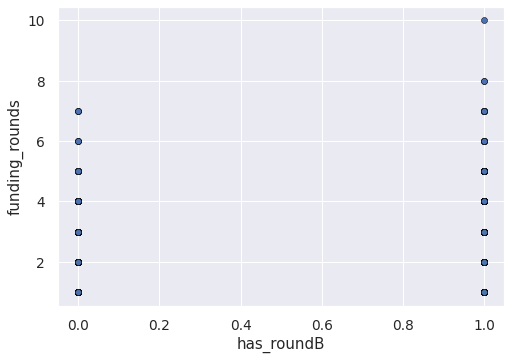

In [32]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['has_roundB'], y=df['funding_rounds'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="has_roundB", ylabel="funding_rounds")

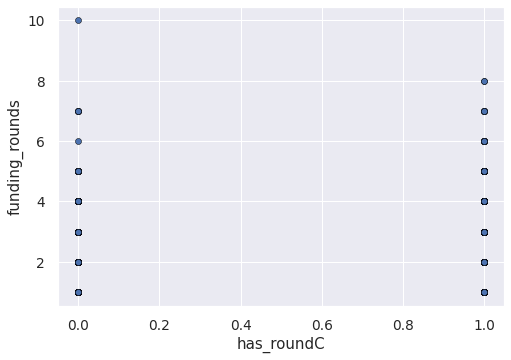

In [33]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['has_roundC'], y=df['funding_rounds'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="has_roundC", ylabel="funding_rounds")

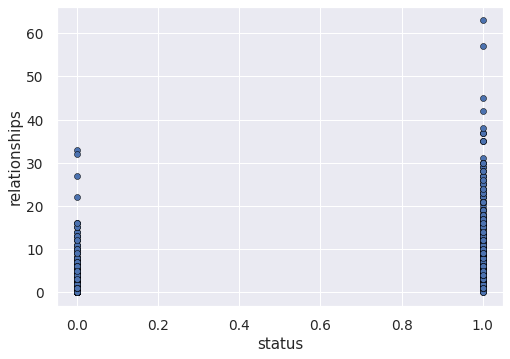

In [34]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['status'], y=df['relationships'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="status", ylabel="relationships")

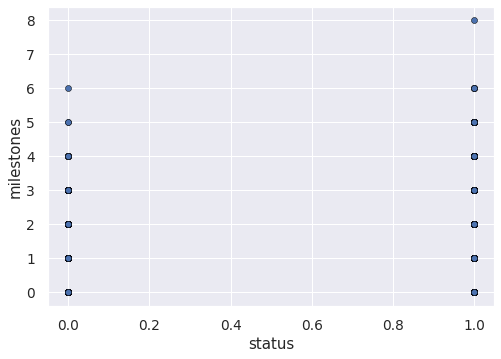

In [35]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['status'], y=df['milestones'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="status", ylabel="milestones")

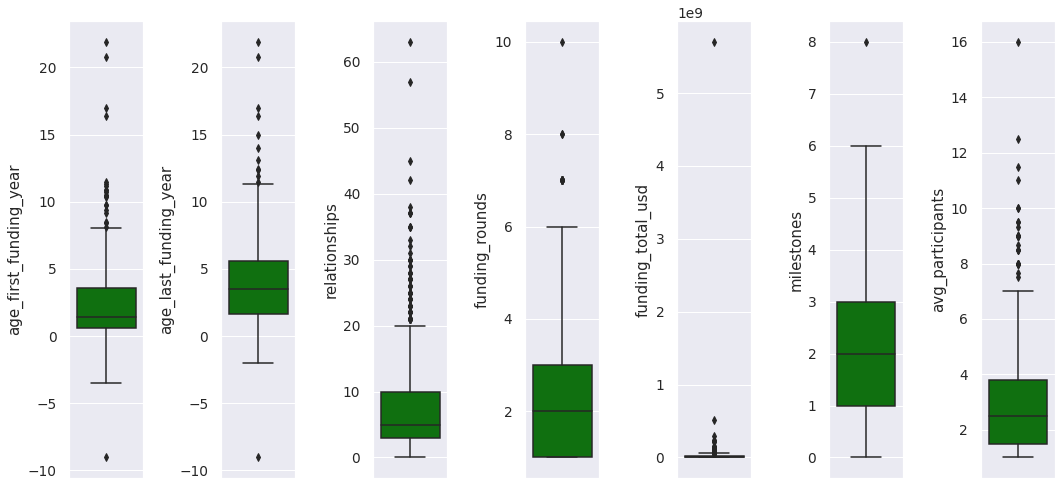

In [36]:
featuresNum = ['age_first_funding_year','age_last_funding_year','relationships','funding_rounds','funding_total_usd','milestones','avg_participants']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=df[featuresNum[i]], color='green', orient='v')
    plt.tight_layout()

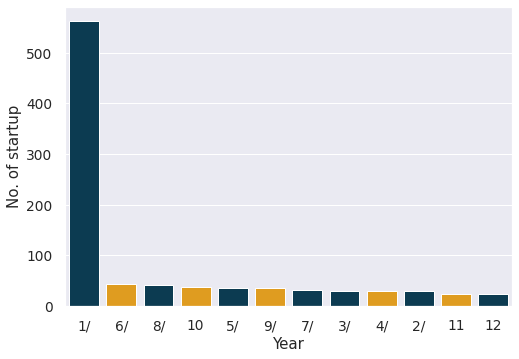

In [37]:
cdf = df["founded_at"].apply(lambda x: '' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "founded_at": "No_of_startup"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_startup", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of startup")

In [38]:
df["founded_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=False)

20:1/    563
20:6/     43
20:8/     42
20:10     38
20:5/     36
20:9/     35
20:7/     31
20:4/     30
20:3/     30
20:2/     29
20:12     23
20:11     23
Name: founded_at, dtype: int64

In [39]:
df["founded_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=True)

20:1/    0.609967
20:6/    0.046587
20:8/    0.045504
20:10    0.041170
20:5/    0.039003
20:9/    0.037920
20:7/    0.033586
20:4/    0.032503
20:3/    0.032503
20:2/    0.031419
20:12    0.024919
20:11    0.024919
Name: founded_at, dtype: float64

total ada 563 startup atau 60% startup yang berdiri pada tahun 2001

In [40]:
df["closed_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=True)

20:31    0.637053
20:1/    0.069339
20:6/    0.041170
20:7/    0.037920
20:2/    0.035753
20:5/    0.033586
20:8/    0.027086
20:3/    0.020585
20:10    0.020585
20:11    0.020585
20:4/    0.019502
20:9/    0.018418
20:12    0.018418
Name: closed_at, dtype: float64

In [41]:
df_acquired = df[(df["status"] == True)]
df_acquired.shape

(597, 47)

In [42]:
df_closed = df[(df["status"] == False)]
df_closed.shape

(326, 47)

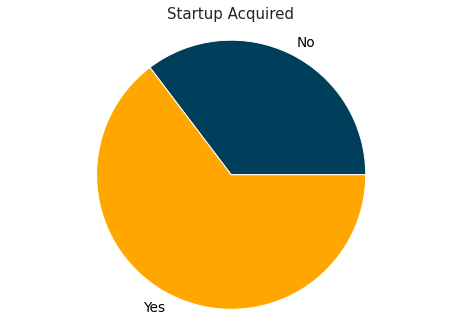

In [43]:
value_counts = df["status"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Startup Acquired')

In [44]:
coba = df[(df["status"] == 1)]

In [45]:
features = coba[["has_VC","has_angel","has_roundA","has_roundB","has_roundC","has_roundD"]]

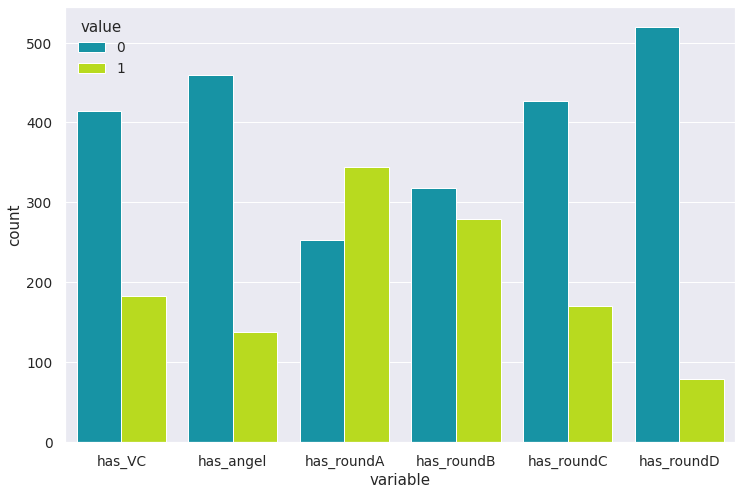

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,8))

a= np.random.choice(["{}".format(i) for i in [1,2,3,4,5,6]], size=(12,8))
coba = pd.DataFrame(a, columns=["has_{}".format(i) for i in list("features")])

sns.countplot(x="variable", hue="value",palette="nipy_spectral", data=pd.melt(features))

plt.show()

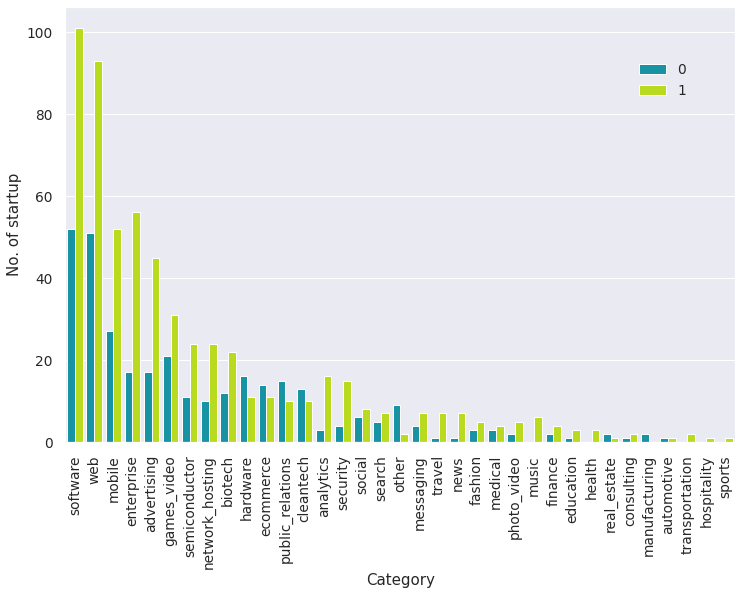

In [47]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="category_code", hue="status", data=df, palette="nipy_spectral",
              order=df.category_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

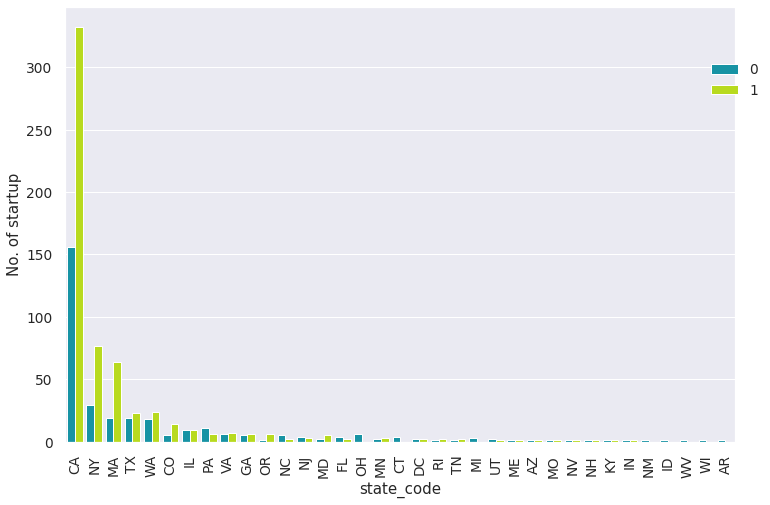

In [48]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="state_code", hue="status", data=df, palette="nipy_spectral",
              order=df.state_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="state_code", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [49]:
trending_statea = df.groupby(['state_code']).size().rename('num_startup').reset_index()

most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)
most_trending_statea

,state_code,num_startup
2,CA,488
23,NY,106
12,MA,83
32,WA,42
29,TX,42
3,CO,19
9,IL,18
26,PA,17
31,VA,13
7,GA,11


In [50]:
trending_statea = df_acquired.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)
most_trending_statea.head(10)

,state_code,category_code,num_startup
31,CA,web,55
72,MA,software,16
111,NY,web,15
144,WA,mobile,5
128,TX,enterprise,4
136,TX,web,4
51,IL,software,4
37,CO,software,4
44,GA,enterprise,2
138,VA,mobile,2


In [ ]:
trending_statec = df_closed.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_trending_statec = trending_statec[trending_statec.groupby('state_code')['num_startup'].transform(max) == trending_statec['num_startup']]
most_trending_statec = most_trending_statec.sort_values('num_startup', ascending=False)
most_trending_statec

In [ ]:
trending_categorya = df_acquired.groupby(['city','category_code']).size().rename('num_startup').reset_index()

most_trending_categorya = trending_categorya[trending_categorya.groupby('city')['num_startup'].transform(max) == trending_categorya['num_startup']]
most_trending_categorya = most_trending_categorya.sort_values('num_startup', ascending=False)
most_trending_categorya

In [ ]:
trending_categoryc = df_closed.groupby(['city','category_code']).size().rename('num_startup').reset_index()

most_trending_categoryc = trending_categoryc[trending_categoryc.groupby('city')['num_startup'].transform(max) == trending_categoryc['num_startup']].reset_index()
most_trending_categoryc = most_trending_categoryc.sort_values('num_startup', ascending=False)


In [54]:
funding_sorted_category = pd.pivot_table(df,
              index=['category_code'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_category.columns = ['category_code', 'funding_total_usd']
funding_sorted_category = funding_sorted_category.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_category.head(10)

,category_code,funding_total_usd
18,mobile,7263750881
30,software,2657598865
34,web,1729035436
3,biotech,1723699484
8,enterprise,1338882096
4,cleantech,1300284730
28,semiconductor,1105156970
0,advertising,918619012
11,games_video,844643530
12,hardware,773938873


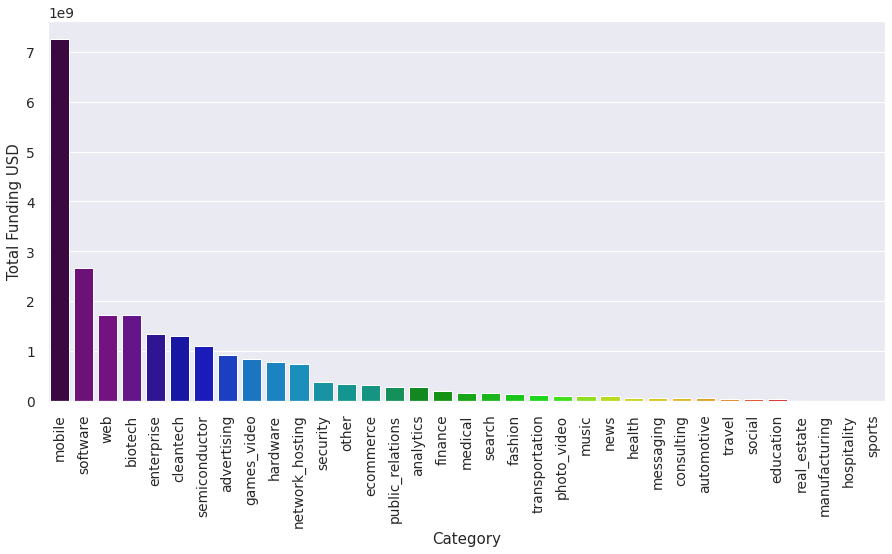

In [55]:
fig, ax = plt.subplots(figsize=(15,7))
_ = sns.barplot(x="category_code", y="funding_total_usd", data=funding_sorted_category,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Total Funding USD")

In [56]:
funding_sorted_city = pd.pivot_table(df,
              index=['city'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_city.columns = ['city', 'funding_total_usd']
funding_sorted_city = funding_sorted_city.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_city = funding_sorted_city.head(10)
funding_sorted_city

,city,funding_total_usd
91,Kirkland,5718914576
174,San Francisco,1673487129
135,New York,1231405734
125,Mountain View,985553322
181,Santa Clara,839050274
176,San Jose,733181780
13,Austin,706317317
173,San Diego,614475001
163,Redwood City,521330100
110,Loveland,510000000


In [58]:
df_what_in_kirkland = df[(df["city"] == 'Kirkland')]
df_what_in_kirkland.shape

(2, 47)

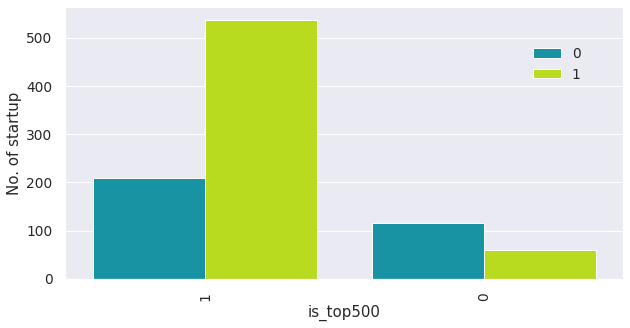

In [61]:
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="is_top500", hue="status", data=df, palette="nipy_spectral",
              order=df.is_top500.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="is_top500", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [62]:
#How many Startup have both 'acquired' status and is_top500?
len(df[(df["status"] == True) & (df["is_top500"] == True)].index)

537

In [63]:
#How many Startup have both 'closed' status and is_top500?
len(df[(df["status"] == False) & (df["is_top500"] == False)].index)

116

In [64]:
df_acquired["is_top500"].value_counts(normalize=True)

1    0.899497
0    0.100503
Name: is_top500, dtype: float64

In [65]:
df_closed.founded_at=pd.to_datetime(df_closed.founded_at)
df_closed.closed_at=pd.to_datetime(df_closed.closed_at)

In [66]:
df_closed['age_closed_startup'] = df_closed.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)

In [67]:
#df_closed['age_closed_startup'] = pd.to_numeric(df['age_closed_startup'].dt.days, downcast='int64')

In [68]:
df_closed['age_closed_startup'].head()

4     792 days
5    2602 days
11   2161 days
12   3039 days
15   4104 days
Name: age_closed_startup, dtype: timedelta64[ns]

In [69]:
df_closed['year'] = df_closed['age_closed_startup'].dt.days /365

In [71]:
(df_closed['age_closed_startup'].mean()) 

Timedelta('2184 days 17:13:37.177914112')

In [72]:
ratarata = round(2184 / 365) 
print("Rata-Rata Startup Closed :", ratarata ,"tahun")

Rata-Rata Startup Closed : 6 tahun


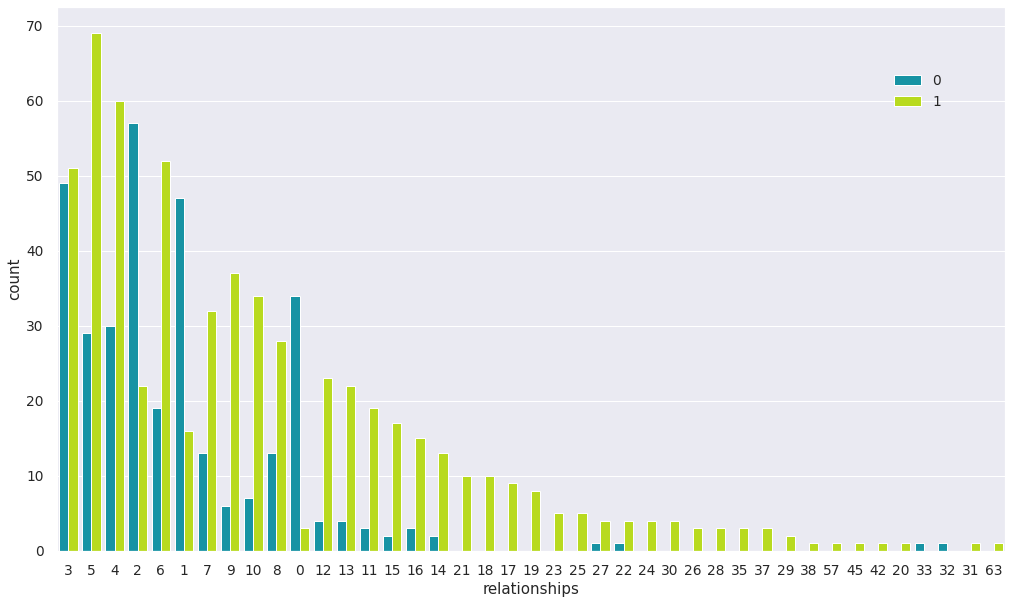

In [73]:
fig, ax = plt.subplots(figsize=(17,10))

sns.countplot(x="relationships", hue="status", data=df, palette="nipy_spectral",
              order=df.relationships.value_counts().index)
plt.legend(bbox_to_anchor=(0.945, 0.90))

<AxesSubplot:xlabel='funding_rounds', ylabel='count'>

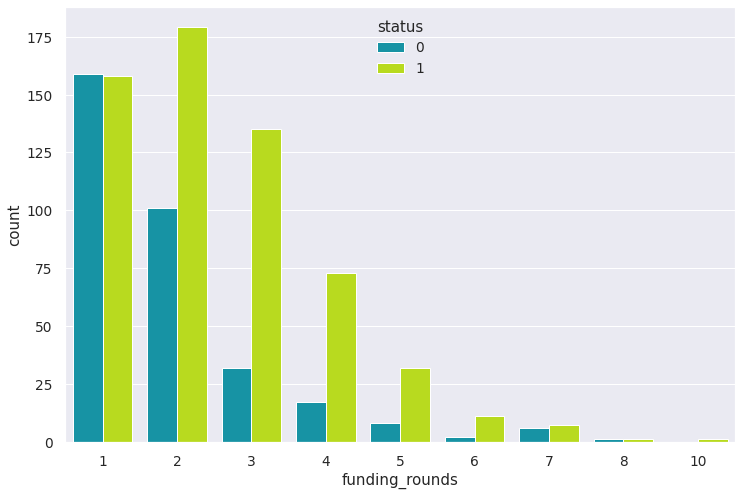

In [74]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="funding_rounds", hue="status", data=df, palette="nipy_spectral",
              order=df.funding_rounds.value_counts().index)
# plt.legend(bbox_to_anchor=(0.945, 0.90))

In [75]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pyshp as shp

In [76]:
import sys

In [77]:
'geopandas' in sys.modules

True

In [78]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

In [79]:
print(gdf.head())

   Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   

            city              Unnamed: 6               name founded_at  \
0      San Diego      San Diego CA 92101        Bandsintown   1/1/2007   
1      Los Gatos      Los Gatos CA 95032          TriCipher   1/1/2000   
2      San Diego      San Diego CA 92121              Plixi  3/18/2009   
3      Cupertino      Cupertino CA 95014  Solidcore Systems   1/1/2002   
4  San Francisco  San Francisco CA 94105     Inhale Digital   8/1/2010   

    closed_at first_funding_at last_funding_at  age_first_funding_year  \
0  31/12/2013         4/1/2009        1/1/2010                  2.

In [80]:
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :")

Duplicate Rows :


In [81]:
#ganti data type ke numerical untuk boxplot
df['age_first_milestone_year'] = df.age_first_milestone_year.astype(float)
df['age_last_milestone_year'] = df.age_last_milestone_year.astype(float)

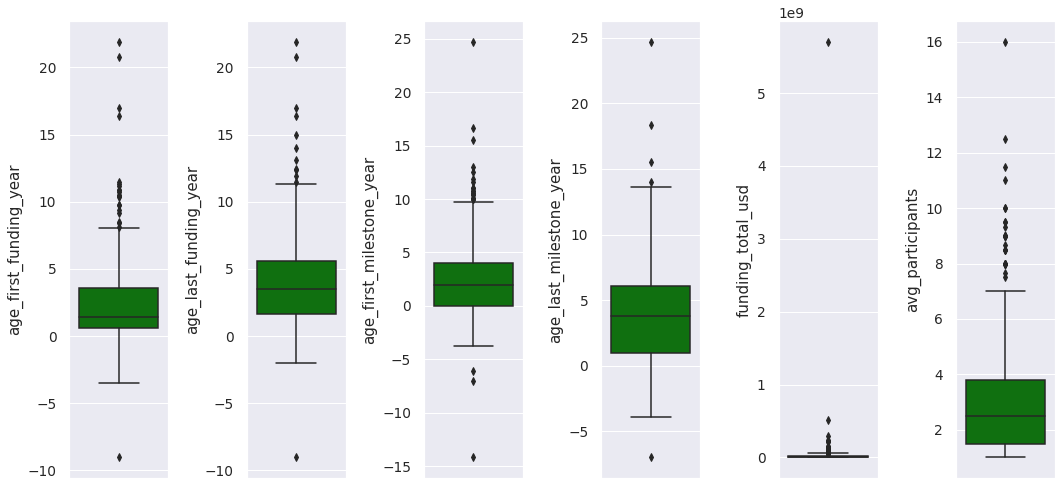

In [82]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd','avg_participants']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

In [83]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)

In [84]:
# drop_outliers(df, 'age_first_funding_year')
# drop_outliers(df, 'age_last_funding_year')
# drop_outliers(df, 'age_first_milestone_year')
# drop_outliers(df, 'age_last_milestone_year')
drop_outliers(df, 'funding_total_usd')

In [85]:
# featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

# plt.figure(figsize=(15, 7))
# for i in range(0, len(featuresNumfinal)):
#     plt.subplot(1, len(featuresNumfinal), i+1)
#     sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
#     plt.tight_layout()

In [86]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : True 
Is there any negative value in 'age_last_funding_year' column  : True 
Is there any negative value in 'age_first_milestone_year' column  : True 
Is there any negative value in 'age_last_milestone_year' column  : True 


In [87]:
df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

In [88]:
# # Get the absolute value of columns including negative value
# df["age_first_funding_year"]=np.abs(df["age_first_funding_year"])
# df["age_last_funding_year"]=np.abs(df["age_last_funding_year"])
# df["age_first_milestone_year"]=np.abs(df["age_first_milestone_year"])
# df["age_last_milestone_year"]=np.abs(df["age_last_milestone_year"])

In [89]:
for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : False 
Is there any negative value in 'age_last_funding_year' column  : False 
Is there any negative value in 'age_first_milestone_year' column  : False 
Is there any negative value in 'age_last_milestone_year' column  : False 


In [90]:
# df["age_first_funding_year"] = np.log(df["age_first_funding_year"])
# df["age_last_funding_year"] = np.log(df["age_last_funding_year"])
# df["age_first_milestone_year"] = np.log(df["age_first_milestone_year"])
# df["age_last_milestone_year"] = np.log(df["age_last_milestone_year"])
# df["funding_total_usd"] = np.log(df["funding_total_usd"])

In [91]:
# plt.figure(figsize=(15,7),dpi=100)

# df["age_first_funding_year"]=np.log(df["age_first_funding_year"]+1)
# plt.subplot(2,4,1)
# plt.xlabel("age_first_funding_year")
# plt.boxplot(df["age_first_funding_year"])   

# plt.subplot(2,4,5)
# sns.distplot(df["age_first_funding_year"] , color="green");


# df["age_last_funding_year"]=np.log(df["age_last_funding_year"]+1)
# plt.subplot(2,4,2)
# plt.xlabel("age_last_funding_year")
# plt.boxplot(df["age_last_funding_year"])   

# plt.subplot(2,4,6)
# sns.distplot(df["age_last_funding_year"], color="green")


# df["age_first_milestone_year"]=np.log(df["age_first_milestone_year"]+1)
# plt.subplot(2,4,3)
# plt.xlabel("age_first_milestone_year")
# plt.boxplot(df["age_first_milestone_year"])   

# plt.subplot(2,4,7)
# sns.distplot(df["age_first_milestone_year"], color="green")


# df["age_last_milestone_year"]=np.log(df["age_last_milestone_year"]+1)
# plt.subplot(2,4,4)
# plt.xlabel("age_last_milestone_year")
# plt.boxplot(df["age_last_milestone_year"])   

# plt.subplot(2,4,8)
# sns.distplot(df["age_last_milestone_year"], color="green");


In [92]:
# print(f"Skewness Co-efficient: {round(df.funding_total_usd.skew(), 3)}")
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# ## Histogram 
# sns.distplot(df['funding_total_usd'] , fit=stats.norm, ax=ax1)
# ax1.set_title('Histogram')

# ## Probability / QQPLOT
# stats.probplot(df['funding_total_usd'], plot=ax2)

# plt.show()

In [93]:
# df["funding_total_usd"] = np.log1p(df["funding_total_usd"])

# ##### GET SKEWNESS #####
# print(f"Skewness Co-efficient: {round(df.funding_total_usd.skew(), 3)}")

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# ##### HISTOGRAM #####
# from scipy import stats
# sns.distplot(df['funding_total_usd'] , fit=stats.norm, ax=ax1)
# ax1.set_title('Histogram')

# ##### PROBABILITY / QQ PLOT #####
# stats.probplot(df['funding_total_usd'], plot=ax2)

# plt.show()

In [94]:
df['has_RoundABCD'] = np.where((df['has_roundA'] == 1) | (df['has_roundB'] == 1) | (df['has_roundC'] == 1) | (df['has_roundD'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,has_RoundABCD
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,POINT (-71.05682 42.35888),0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,POINT (-121.97372 37.23892),1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,POINT (-117.19266 32.90105),1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,POINT (-122.05004 37.32031),1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,POINT (-122.41924 37.77928),0


In [95]:
df['has_Investor'] = np.where((df['has_VC'] == 1) | (df['has_angel'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,has_RoundABCD,has_Investor
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,POINT (-71.05682 42.35888),0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,POINT (-121.97372 37.23892),1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,POINT (-117.19266 32.90105),1,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,POINT (-122.05004 37.32031),1,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,POINT (-122.41924 37.77928),0,1


In [96]:
len(df[(df["has_RoundABCD"] == 1)].index)

577

In [97]:
len(df[ (df['has_RoundABCD']  == 1) & (df['status']  == 1) ].index)

410

In [98]:
len(df)

775

In [99]:
923-490

433

In [100]:
df['has_Seed'] = np.where((df['has_RoundABCD'] == 0) & (df['has_Investor'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,has_RoundABCD,has_Investor,has_Seed
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,POINT (-71.05682 42.35888),0,1,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,POINT (-121.97372 37.23892),1,1,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,POINT (-117.19266 32.90105),1,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,POINT (-122.05004 37.32031),1,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,POINT (-122.41924 37.77928),0,1,1


In [ ]:
df['has_Seed'] == 1

In [102]:
len(df[(df["has_Seed"] == 1)].index)

174

In [103]:
df['invalid_startup'] = np.where((df['has_RoundABCD'] == 0) & (df['has_VC'] == 0) & (df['has_angel'] == 0), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,has_RoundABCD,has_Investor,has_Seed,invalid_startup
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,POINT (-71.05682 42.35888),0,1,1,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,POINT (-121.97372 37.23892),1,1,0,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,POINT (-117.19266 32.90105),1,0,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,POINT (-122.05004 37.32031),1,0,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,POINT (-122.41924 37.77928),0,1,1,0


In [104]:
len(df[(df["invalid_startup"] == 1)].index)

24

In [105]:
df.founded_at=pd.to_datetime(df.founded_at)
df.closed_at=pd.to_datetime(df.closed_at)

In [106]:
df['age_closed_startup'] = df.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)

In [107]:
df['age_closed_startup'].head()

0   2556 days
1   5113 days
2   1749 days
3   4382 days
4    792 days
Name: age_closed_startup, dtype: timedelta64[ns]

In [108]:
df['startUp_age_year'] = df['age_closed_startup'].dt.days /365

In [109]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,has_RoundABCD,has_Investor,has_Seed,invalid_startup,age_closed_startup,startUp_age_year
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,2007-01-01,2013-12-31,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,POINT (-71.05682 42.35888),0,1,1,0,2556 days,7.002740
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,2000-01-01,2013-12-31,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,POINT (-121.97372 37.23892),1,1,0,0,5113 days,14.008219
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,2009-03-18,2013-12-31,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,POINT (-117.19266 32.90105),1,0,0,0,1749 days,4.791781
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,2002-01-01,2013-12-31,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,POINT (-122.05004 37.32031),1,0,0,0,4382 days,12.005479
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,2010-08-01,2012-10-01,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,POINT (-122.41924 37.77928),0,1,1,0,792 days,2.169863


In [110]:
df = df.drop(['state_code','id','Unnamed: 6','category_code','object_id'],axis=1)
df = df.drop(['zip_code','founded_at','closed_at','first_funding_at','last_funding_at','city','name'],axis=1)
df = df.drop(['Unnamed: 0'],axis=1)
df = df.drop(['latitude','longitude'],axis=1)
df = df.drop(['geometry'],axis=1)

df = df.drop(['age_closed_startup'],axis=1)

In [111]:
# df['age_first_milestone_year'].astype(str).astype(float)
# df['age_last_milestone_year'].astype(str).astype(float)

df['age_first_milestone_year'] = df.age_first_milestone_year.astype(float)
df['age_last_milestone_year'] = df.age_last_milestone_year.astype(float)

In [112]:
#Cek categorical
cat_feature = df.select_dtypes(include='object')
cat_feature.head()

""
0
1
2
3
4


In [113]:
from sklearn.model_selection import train_test_split
# Split the data
# Input/independent variables
X = df.drop('status', axis = 1) # her we are droping the output feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'

y = df['status'] # Output/Dependent variable
# train_x, test_x,train_y,test_y = train_test_split(X,y)

In [114]:
# # Scaling the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X =  sc.fit_transform(X)
# X

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [116]:
# lets print the shapes again 
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)


Shape of the X Train : (620, 36)
Shape of the y Train : (620,)
Shape of the X test : (155, 36)
Shape of the y test : (155,)


In [117]:
# Model Build
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import lightgbm as lgb
#lightGBM model fit
gbm = lgb.LGBMRegressor()
gbm.fit(X_train,y_train)
gbm.booster_.feature_importance()


# importance of each attribute
fea_imp_ = pd.DataFrame({'cols':X.columns, 'fea_imp':gbm.feature_importances_})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

In [ ]:
from sklearn.feature_selection import RFE
# create the RFE model and select 10 attributes
rfe = RFE(gbm, 10)
rfe = rfe.fit(X_train,y_train)

# summarize the selection of the attributes
print(rfe.support_)

# summarize the ranking of the attributes
fea_rank_ = pd.DataFrame({'cols':X.columns, 'fea_rank':rfe.ranking_})
fea_rank_.loc[fea_rank_.fea_rank > 0].sort_values(by=['fea_rank'], ascending = True)

Training Accuracy : 1.0
Testing Accuracy : 0.8774193548387097


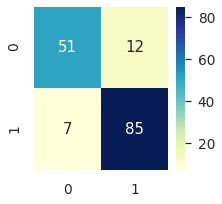

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        63
           1       0.88      0.92      0.90        92

    accuracy                           0.88       155
   macro avg       0.88      0.87      0.87       155
weighted avg       0.88      0.88      0.88       155

------------------------------------------
ROC Curves              = 0.8667184265010351
Precision-Recall Curves = 0.922681496797328


In [120]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(learning_rate=0.02,
                    boosting_type='gbdt', max_depth=4,  objective='binary', 
                    random_state=100,  
                  n_estimators=1000 ,reg_alpha=0, reg_lambda=1, n_jobs=-1)


clf.fit(X_train,y_train)

y_pred_lgb = clf.predict(X_test)


print("Training Accuracy :", clf.score(X_train, y_train))
print("Testing Accuracy :", clf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_lgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_lgb)
print(cr)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_lgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb)
Precision_Recall_lgbm = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_lgbm)

[06:41:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy : 1.0
Testing Accuracy : 0.8580645161290322


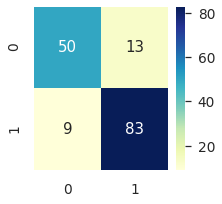

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        63
           1       0.86      0.90      0.88        92

    accuracy                           0.86       155
   macro avg       0.86      0.85      0.85       155
weighted avg       0.86      0.86      0.86       155

------------------------------------------
ROC Curves              = 0.847912353347136
Precision-Recall Curves = 0.9124108812529219


In [121]:
from xgboost import XGBClassifier

#train
xgb = XGBClassifier()

xgb.fit(X_train,y_train)

#predict
y_predicted_xgb = xgb.predict(X_test)

print("Training Accuracy :", xgb.score(X_train, y_train))
print("Testing Accuracy :", xgb.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_xgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_xgb)
print(cr)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_xgb)
f1 = f1_score(y_test, y_predicted_xgb)
Precision_Recall_xgb = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_xgb)

Training Accuracy : 1.0
Testing Accuracy : 0.8774193548387097


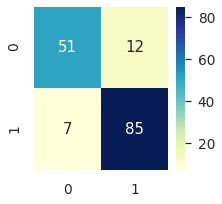

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        63
           1       0.88      0.92      0.90        92

    accuracy                           0.88       155
   macro avg       0.88      0.87      0.87       155
weighted avg       0.88      0.88      0.88       155

------------------------------------------
ROC Curves              = 0.8667184265010351
Precision-Recall Curves = 0.922681496797328


In [122]:
from sklearn.ensemble import GradientBoostingClassifier
#train
gbc = GradientBoostingClassifier(learning_rate=0.02,
                    max_depth=4,
                    random_state=100, n_estimators=1000)


gbc.fit(X_train,y_train)

#predict
y_predicted_gb = gbc.predict(X_test)

print("Training Accuracy :", gbc.score(X_train, y_train))
print("Testing Accuracy :", gbc.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_gb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_gb)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_gb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_gb)
f1 = f1_score(y_test, y_predicted_gb)
Precision_Recall_gbs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_gbs)

In [123]:
0.922681496797328

0.922681496797328

Training Accuracy : 0.8935483870967742
Testing Accuracy : 0.864516129032258


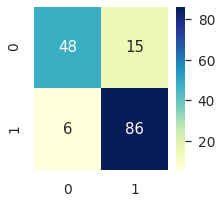

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        63
           1       0.85      0.93      0.89        92

    accuracy                           0.86       155
   macro avg       0.87      0.85      0.86       155
weighted avg       0.87      0.86      0.86       155

roc_auc 0.8483436853002071
------------------------------------------
ROC Curves              = 0.8483436853002071
Precision-Recall Curves = 0.9124887173149292


In [124]:
from sklearn.ensemble import AdaBoostClassifier
#train
ada = AdaBoostClassifier()


ada.fit(X_train,y_train)

#predict
y_predicted_ab = ada.predict(X_test)

print("Training Accuracy :", ada.score(X_train, y_train))
print("Testing Accuracy :", ada.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_ab)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_ab)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_ab)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_ab)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_ab)
f1 = f1_score(y_test, y_predicted_ab)
Precision_Recall_abs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_abs)

Training Accuracy : 0.6548387096774193
Testing Accuracy : 0.5935483870967742


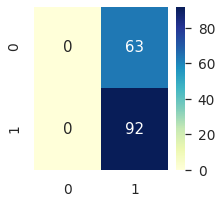

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.59      1.00      0.74        92

    accuracy                           0.59       155
   macro avg       0.30      0.50      0.37       155
weighted avg       0.35      0.59      0.44       155

------------------------------------------
ROC Curves              = 0.5
Precision-Recall Curves = 0.7967741935483871


In [125]:
from sklearn.svm import SVC
sv = SVC()

sv.fit(X_train,y_train)


y_pred_sv = sv.predict(X_test)

print("Training Accuracy :", sv.score(X_train, y_train))
print("Testing Accuracy :", sv.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_sv)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_sv)
print(cr)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_sv)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_sv)
f1 = f1_score(y_test, y_pred_sv)
Precision_Recall_svc = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_svc)

Training Accuracy : 1.0
Testing Accuracy : 0.8516129032258064


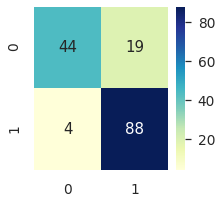

              precision    recall  f1-score   support

           0       0.92      0.70      0.79        63
           1       0.82      0.96      0.88        92

    accuracy                           0.85       155
   macro avg       0.87      0.83      0.84       155
weighted avg       0.86      0.85      0.85       155

------------------------------------------
ROC Curves              = 0.8274672187715666
Precision-Recall Curves = 0.902379048642697


In [126]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train,y_train)


y_pred_rf = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

In [127]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

scores = {'LGBM':  { 
                             'precision_score': precision_score(y_test, y_pred_lgb),
                             'recall_score': recall_score(y_test, y_pred_lgb)
                         },        
                 'GradientBoosting Classifier':  { 
                             'precision_score': precision_score(y_test, y_predicted_gb),
                             'recall_score': recall_score(y_test, y_predicted_gb)
                         },
                 'Adaboost Classifier':  { 
                             'precision_score': precision_score(y_test, y_predicted_ab),
                             'recall_score': recall_score(y_test, y_predicted_ab)
                         },
                 'SVC':  { 
                             'precision_score': precision_score(y_test, y_pred_sv),
                             'recall_score': recall_score(y_test, y_pred_sv)
                         },
                 'XGBoost':  { 
                             'precision_score': precision_score(y_test, y_predicted_xgb),
                             'recall_score': recall_score(y_test, y_predicted_xgb)
                         },
                 'Random Forest':  { 
                             'precision_score': precision_score(y_test, y_pred_rf),
                            'recall_score': recall_score(y_test, y_pred_rf)
                         }
            }

In [128]:
from sklearn.metrics import precision_score


Precision_Recall = {'LGBM':  { 
                             'Precision_Recall': Precision_Recall_lgbm
                         },        
                 'GradientBoosting Classifier':  { 
                             'Precision_Recall': Precision_Recall_gbs
                         },
                 'Adaboost Classifier':  { 
                             'Precision_Recall': Precision_Recall_abs
                         },
                 'SVC':  { 
                             'Precision_Recall': Precision_Recall_svc
                         },
                 'XGBoost':  { 
                             'Precision_Recall': Precision_Recall_xgb
                         },
                 'Random Forest':  { 
                             'Precision_Recall': Precision_Recall_rfs
                         }
            }

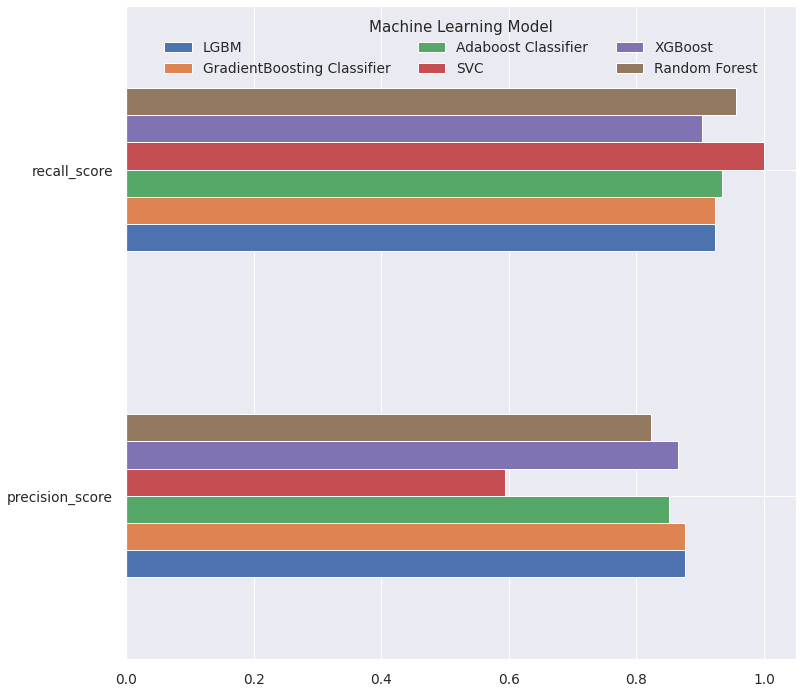

In [129]:
scores = pd.DataFrame(scores)


scores.plot(kind="barh",figsize=(12, 12)).legend(loc='upper center', ncol=3, title="Machine Learning Model")

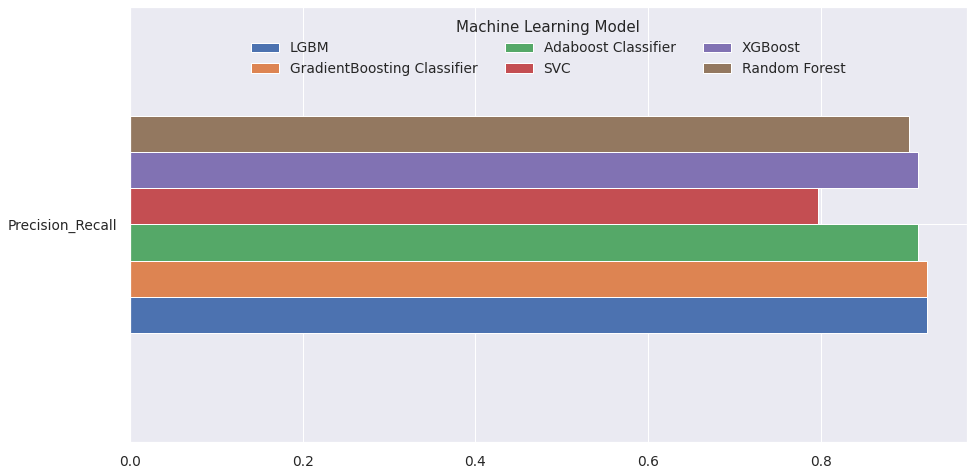

In [130]:
Precision_Recall = pd.DataFrame(Precision_Recall)


Precision_Recall.plot(kind="barh",figsize=(15, 8)).legend(loc='upper center', ncol=3, title="Machine Learning Model")